In [ ]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.1 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = Path ('/content/drive/MyDrive/dataset1-tiff')

In [ ]:
def create_vit_model(pretrained=True):
    # get a ViT model form timm，and use 'vit_base_patch16_224' as a pretrain model
    model = timm.create_model('vit_base_patch16_224', pretrained=pretrained, num_classes=10)
    
    #num_classes = 10 
    #model.head = nn.Linear(model.classifier.in_features, num_classes)
    
    return model

In [ ]:
# Build the datablock
datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test'), #splitter
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = datablock.dataloaders(DATASET_PATH)

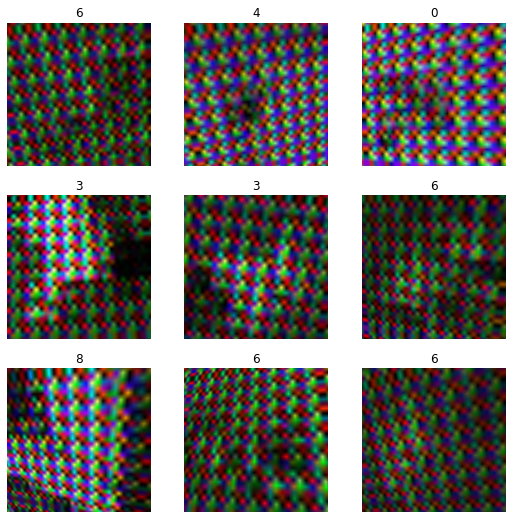

In [ ]:
dls.show_batch()

In [ ]:
vit_model = create_vit_model()
learn = Learner(dls, vit_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

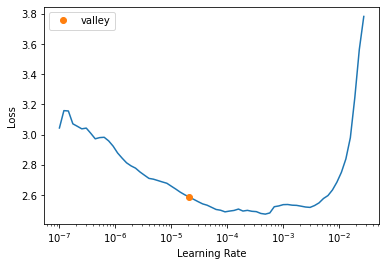

In [ ]:
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
# Train the model
learn.fit_one_cycle(18, lr_rate)

epoch,train_loss,valid_loss,accuracy,time
0,1.570386,1.564713,0.418800,12:20
1,1.280672,1.208286,0.570900,06:24
2,1.074558,1.019364,0.640300,06:24
3,0.793124,0.737330,0.740900,06:24
4,0.628488,0.634976,0.773300,06:24
5,0.507473,0.527240,0.819700,06:25
6,0.393043,0.521650,0.823200,06:24
7,0.299187,0.540004,0.829800,06:25
8,0.209681,0.532976,0.843500,06:25
9,0.155612,0.510964,0.853900,06:25


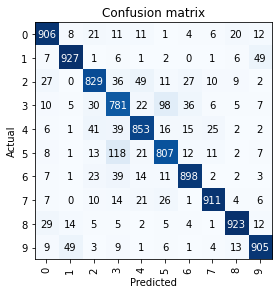

In [ ]:
# model evaluations
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.recorder.summary()

VisionTransformer (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 768 x 14 x 14  
Conv2d                                    590592     True      
Identity                                                       
Dropout                                                        
Identity                                                       
LayerNorm                                 1536       True      
____________________________________________________________________________
                     64 x 197 x 2304     
Linear                                    1771776    True      
Dropout                                                        
Linear                                    590592     True      
Dropout                                                        
Identity                                                       
Identity                                                       
LayerNorm          

In [ ]:
# export the model
learn.export('/content/drive/MyDrive/Model/data1_ViT_tiff.pkl')